# Business problem understanding
The business problem is predicting if a customer will buy a product based on factors like age and income. This helps businesses focus their marketing efforts on people who are more likely to make a purchase, saving time and money. It also allows for more targeted campaigns that can improve sales and customer engagement.

Dataset Overview:
The Social Network Ads Dataset includes the following features:
Age: Age of the user.
Estimated Salary: Estimated annual salary of the user in USD.
Purchased: Whether the user clicked on the ad (1 = Yes, 0 = No).

In [16]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [17]:
df = pd.read_csv(r"C:\Users\L.RAMYA\Downloads\Social_Network_Ads.csv-new.csv")

In [18]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,no
1,35,20000,no
2,26,43000,no
3,27,57000,no
4,19,76000,no
...,...,...,...
395,46,41000,yes
396,51,23000,yes
397,50,20000,yes
398,36,33000,no


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              400 non-null    int64 
 1   EstimatedSalary  400 non-null    int64 
 2   Purchased        400 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.5+ KB


The dataset consists of 400 entries with 3 columns:

Age and EstimatedSalary are numeric columns (both of type int64), representing the age and salary of users.
Purchased is an object type column that indicates whether the user purchased the product or not (likely in string format, e.g., "Yes" or "No").
This dataset is clean with no missing values, and it's ready for analysis and modeling.

In [20]:
df.dtypes

Age                 int64
EstimatedSalary     int64
Purchased          object
dtype: object

The dataset contains three columns:

Age and EstimatedSalary are both integers (int64), representing the user's age and estimated salary.
Purchased is an object type (object), which likely contains categorical data such as "Yes" or "No" to indicate whether the user purchased the product.

In [21]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

The result of df.isnull().sum() shows that there are no missing values in any of the columns. Specifically:

Age has no missing values (0).
EstimatedSalary has no missing values (0).
Purchased also has no missing values (0).

In [22]:
df.duplicated().sum()

33

The result of df.duplicated().sum() shows that there are 33 duplicate rows in the dataset. This means that 33 rows are exact duplicates of others, and i am removing them to ensure that your analysis 

In [23]:
df[df.duplicated]

,Age,EstimatedSalary,Purchased
23,45,22000,yes
54,27,58000,no
74,32,18000,no
86,24,55000,no
94,29,83000,no
138,28,59000,no
150,26,15000,no
186,20,82000,no
192,29,43000,no
195,34,43000,no


In [24]:
df.drop_duplicates(inplace = True,ignore_index=True)

In [25]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,no
1,35,20000,no
2,26,43000,no
3,27,57000,no
4,19,76000,no
...,...,...,...
362,46,41000,yes
363,51,23000,yes
364,50,20000,yes
365,36,33000,no


By using df.drop_duplicates(inplace=True, ignore_index=True), you have removed the 33 duplicate rows from the dataset and reset the index. The dataset is now free of duplicates, and the index is re-ordered sequentially from 0 to the number of remaining rows.

In [26]:
df=df.drop(columns='Purchased')
df

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
362,46,41000
363,51,23000
364,50,20000
365,36,33000


After dropping the "Purchased" column with df = df.drop(columns='Purchased'), the dataset now only contains the Age and EstimatedSalary columns. These features are ready to be used for further analysis or clustering without the target variable "Purchased" included.

In [27]:
df.skew()


Age                0.220526
EstimatedSalary    0.449029
dtype: float64

In [28]:
continous = ['Age','EstimatedSalary']

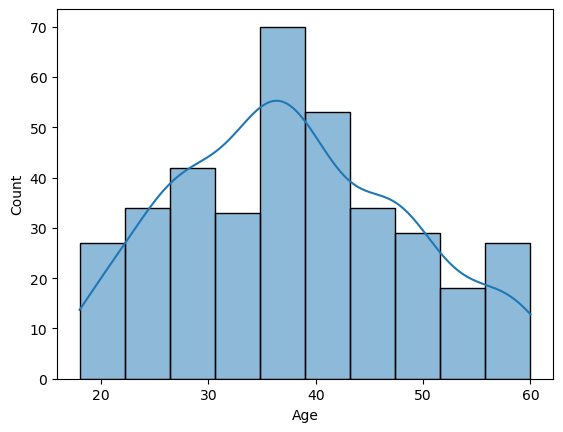

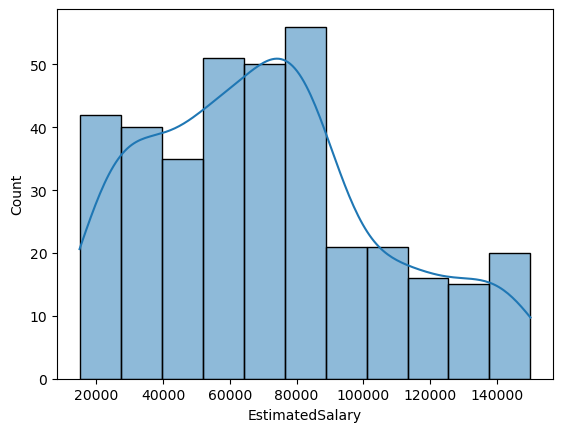

In [31]:
 for i in continous:
     sns.histplot(df[i],kde=True)
     plt.show()

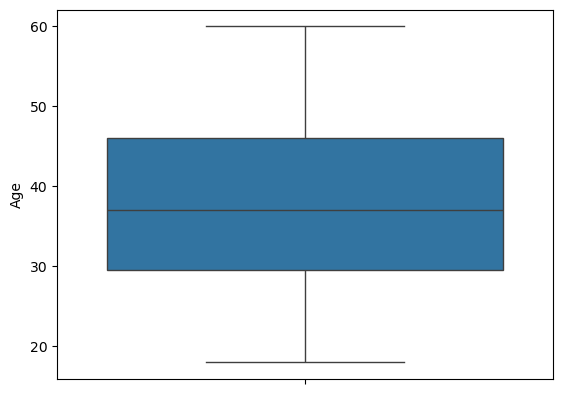

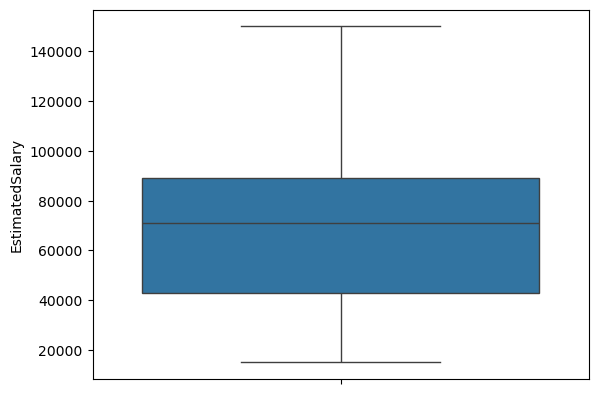

In [32]:
 for p in continous:
     sns.boxplot(df[p])
     plt.show()

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

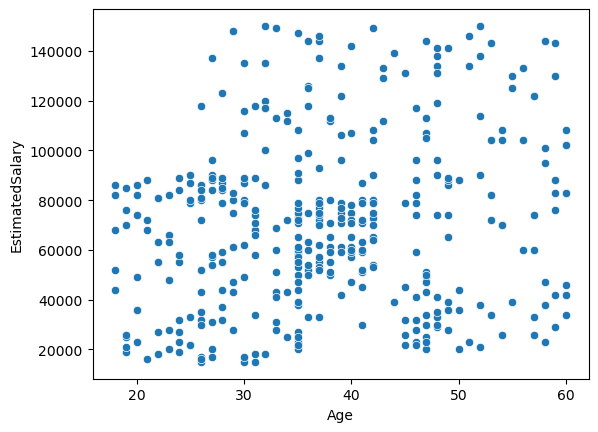

In [33]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=df)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

# Select the features for scaling
scaler = StandardScaler()
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])

# Check the updated dataframe
df


,Age,EstimatedSalary
0,-1.755169,-1.489408
1,-0.255190,-1.460610
2,-1.098928,-0.798259
3,-1.005180,-0.395088
4,-1.755169,0.152072
...,...,...
362,0.776045,-0.855854
363,1.244788,-1.374216
364,1.151039,-1.460610
365,-0.161442,-1.086238


for unsupevised machine learning,there is no output variable

In [35]:
X =df

**K.MEANS - clustering**
- find the optimal number of clusters:Elbow Curve

In [36]:
wcss =[]
for k in range(1,11):
     from sklearn.cluster import KMeans
     kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state=3)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
print(wcss)    

[733.9999999999998, 470.8255287397306, 292.207332528478, 223.16472672966785, 167.37602615244273, 121.96629766360059, 102.08601504754806, 90.40926353795545, 82.36292021855641, 75.30857026876176]


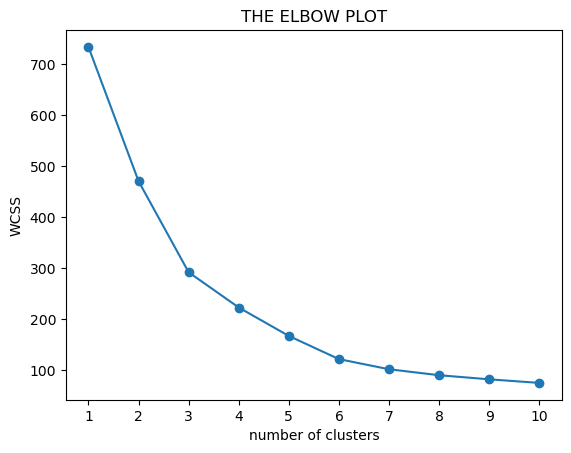

In [37]:
# using the elbow method
plt.plot(range(1,11),wcss,marker ='o')
plt.xticks(range(1,11))
plt.title('THE ELBOW PLOT')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=True)
# fit and predict
X['km_cluster']=kmeans.fit_predict(X)

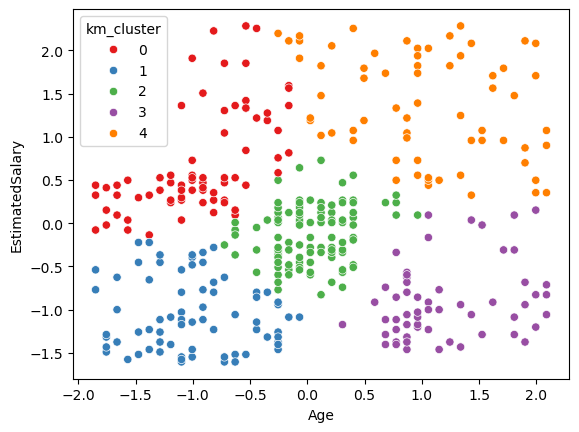

In [39]:
sns.scatterplot(x="Age",y='EstimatedSalary',hue='km_cluster',data=X,palette="Set1")
plt.show()

 this means you've divided the users into 5 distinct groups based on their Age and Estimated Salary. These clusters can represent different types of customers or potential buyers. You can use this information to target specific groups with tailored marketing strategies, such as focusing on high-income users or younger users, depending on the business objective. The next step would be to analyze each cluster's characteristics to make strategic decisions.

If you've obtained 5 clusters based on the dataset (with Age and Estimated Salary as features), it means that your data has been divided into 5 distinct groups based on these characteristics. Each cluster represents a unique segment of users, and they may show patterns in purchasing behavior. You can analyze each cluster to see which features (e.g., age and salary) differentiate them, and use that information to target marketing efforts more effectively to each group.

2. **HIERARCHICAL CLUSTERING**

- identifying the optimal number of clusters using dendrogram

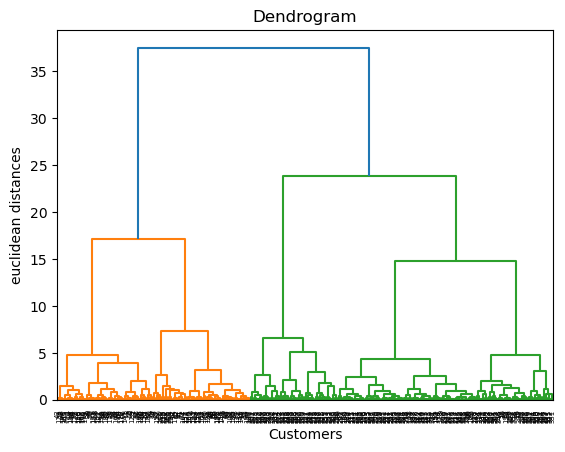

In [40]:
import scipy.cluster.hierarchy as sch
data = sch.linkage(X,method ='ward')
dendrogram = sch.dendrogram(data)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('euclidean distances')
plt.show()

- hierarchical clustering model

In [41]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters =5,metric='euclidean',linkage='ward')
#fit and predict
X['h_cluster']= hc.fit_predict(X)

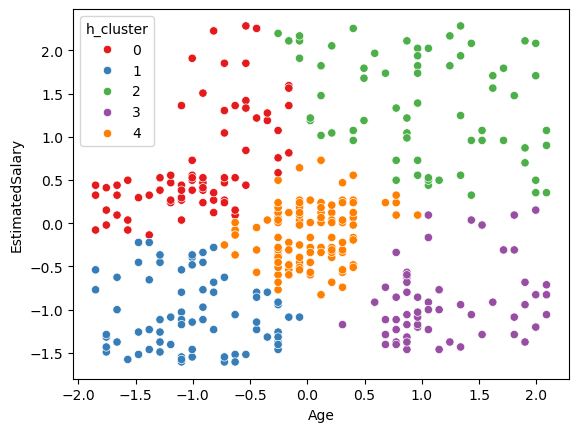

In [42]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=X,hue='h_cluster',palette='Set1',)
plt.show()

3. **DBSCAN CLUSTERING**

In [43]:
for r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs = DBSCAN(eps=r,min_samples=m)
        X['db_cluster'] = dbs.fit_predict(X)
    if X['db_cluster'].nunique()==5:
        break

print(r)
print(m)

1
9


In [44]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=8,min_samples=9)
X['db_Cluster'] = dbs.fit_predict(X)


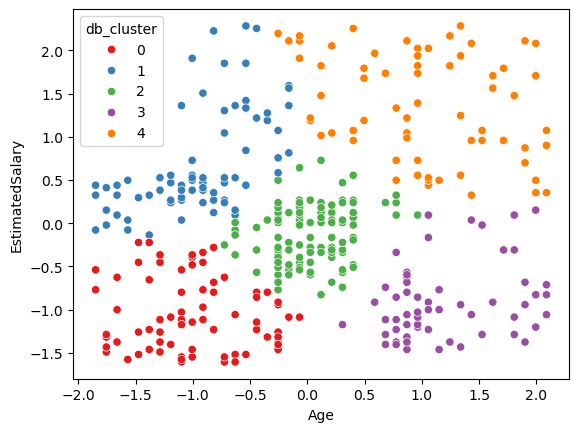

In [45]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='db_cluster',data=X,palette='Set1',)
plt.show()

In [52]:
score = silhouette_score(X, hc.labels_)
print("Silhouette Score:", score)



Silhouette Score: 0.6768349307478021


In [54]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, model.labels_)
print("Silhouette Score:", score)


NameError: name 'X_scaled' is not defined

In [49]:
import joblib
joblib.dump(hc, 'kmeans_model.pkl')

['kmeans_model.pkl']